# Prediction using keras tuner and keras

Let us import pandas to read our csv file.

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Dataset/train_clean_data.csv')

In [4]:
df.head()

Total_Stops  Price  Journey_Month  Journey_Day  Dep_hour  Dep_min  \
0            0   3897              3           24        22       20   
1            2   7662              5            1         5       50   
2            2  13882              6            9         9       25   
3            1   6218              5           12        18        5   
4            1  13302              3            1        16       50   

   Arrival_hour  Arrival_min  Duration_hour  Duration_min  ...  \
0             1           10              2            50  ...   
1            13           15              7            25  ...   
2             4           25             19             0  ...   
3            23           30              5            25  ...   
4            21           35              4            45  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 30 columns]

Let us assign price as output and rest all of the columns as input.

In [5]:
X=df.drop(['Price'],axis=1)
y=df[['Price']]
X=X.iloc[:,:].values
y=y.iloc[:,:].values

In [6]:
X

array([[ 0,  3, 24, ...,  0,  0,  1],
       [ 2,  5,  1, ...,  0,  0,  0],
       [ 2,  6,  9, ...,  0,  0,  0],
       ...,
       [ 0,  4, 27, ...,  0,  0,  0],
       [ 0,  3,  1, ...,  0,  0,  1],
       [ 2,  5,  9, ...,  0,  0,  0]], dtype=int64)

In [7]:
X.shape

(10682, 29)

In [8]:
y

array([[ 3897],
       [ 7662],
       [13882],
       ...,
       [ 7229],
       [12648],
       [11753]], dtype=int64)

In [9]:
y.shape

(10682, 1)

Let us normalize our input and output.

In [10]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


In [11]:
X_scaled

array([[-1.22066609, -1.46740227,  1.23728754, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [ 1.74143186,  0.25028893, -1.47530729, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [ 1.74143186,  1.10913453, -0.53179604, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       ...,
       [-1.22066609, -0.60855667,  1.59110426, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [-1.22066609, -1.46740227, -1.47530729, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [ 1.74143186,  0.25028893, -0.53179604, ..., -0.2642058 ,
        -0.19231927, -0.30917591]])

In [12]:
y_scaled

array([[-1.12553455],
       [-0.30906781],
       [ 1.03978296],
       ...,
       [-0.40296691],
       [ 0.77218138],
       [ 0.57809433]])

Let us split our dataset into training and testing sets.

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.3,random_state=0)

Let us import Sequential for declaring our model and Dense to specify number of layers.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Let us define keras model with 18 layers with input layer having 256 nodes, optimizer adam and loss mean_squared_error for regression.

In [16]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(29,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [17]:
model = regression_model()

Let us fit our training data.

In [18]:
model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
164/164 - 1s - loss: 0.5567 - val_loss: 0.3925
Epoch 2/100
164/164 - 0s - loss: 0.3643 - val_loss: 0.2684
Epoch 3/100
164/164 - 0s - loss: 0.3556 - val_loss: 0.4046
Epoch 4/100
164/164 - 0s - loss: 0.3230 - val_loss: 0.2526
Epoch 5/100
164/164 - 0s - loss: 0.2718 - val_loss: 0.3402
Epoch 6/100
164/164 - 0s - loss: 0.2650 - val_loss: 0.2579
Epoch 7/100
164/164 - 0s - loss: 0.2418 - val_loss: 0.2397
Epoch 8/100
164/164 - 0s - loss: 0.2250 - val_loss: 0.2230
Epoch 9/100
164/164 - 0s - loss: 0.2131 - val_loss: 0.2874
Epoch 10/100
164/164 - 0s - loss: 0.2058 - val_loss: 0.2123
Epoch 11/100
164/164 - 0s - loss: 0.2058 - val_loss: 0.2528
Epoch 12/100
164/164 - 0s - loss: 0.2209 - val_loss: 0.2247
Epoch 13/100
164/164 - 0s - loss: 0.2286 - val_loss: 0.2759
Epoch 14/100
164/164 - 0s - loss: 0.2153 - val_loss: 0.3580
Epoch 15/100
164/164 - 0s - loss: 0.2167 - val_loss: 0.2124
Epoch 16/100
164/164 - 0s - loss: 0.2069 - val_loss: 0.2836
Epoch 17/100
164/164 - 0s - loss: 0.2768 - val_lo

Let us print our loss.

In [19]:
score = model.evaluate(X_test, y_test,verbose=0)
print('Loss:',score)

Loss: 0.2396451234817505


Our loss is 0.239.

Let us print predicted values.

In [34]:
pred=model.predict(X_test)
pred

array([[ 0.41498017],
       [-0.60156405],
       [-1.2054727 ],
       ...,
       [-0.71864486],
       [ 0.13518067],
       [-0.25895363]], dtype=float32)

Let us display our outputs.

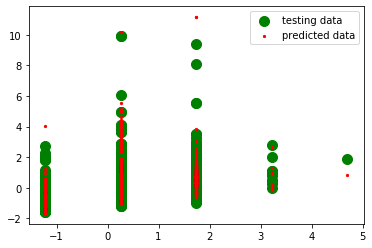

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_test[:,0], y_test, s = 100, c = 'g', label = 'testing data')
ax1.scatter(X_test[:,0], pred, s = 5, c = 'r', label = 'predicted data')
plt.legend(loc='upper right');
plt.show()